In [123]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from scipy import stats
import matplotlib.pyplot as plt

In [155]:
data_path = "../data/train.csv"
df = pd.read_csv(data_path)
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [156]:
df[df.isnull().any(axis=1)].isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
5,False,False,False,False,False,True,False,False,False,False,True,False
7,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
884,False,False,False,False,False,False,False,False,False,False,True,False
885,False,False,False,False,False,False,False,False,False,False,True,False
886,False,False,False,False,False,False,False,False,False,False,True,False
888,False,False,False,False,False,True,False,False,False,False,True,False


# Types of Data:

# 1. Numerical Data:
 - Continuous: Can take any value within a range (e.g., height, weight, temperature)
 - Discrete: Takes distinct, separate values (e.g., count of items, number of children)
# 
# 2. Categorical Data:
 - Nominal: Categories with no natural order (e.g., colors, gender, blood types)
 - Ordinal: Categories with a natural order (e.g., education level, satisfaction ratings)
# 
# 3. Time Series Data: Data points collected at specific time intervals
# 
# 4. Text Data: Unstructured text that requires natural language processing
# 
# 5. Binary Data: Data with only two possible values (e.g., yes/no, true/false)

In [126]:
continuous_columns = ['Fare']

discrete_columns = ['Age', 'SibSp', 'Parch', 'Pclass','PassengerId'] # Let's check in the description

nominal_columns = ['Sex', 'Embarked', 'Cabin', 'Ticket']
ordinal_columns = ['Pclass']
text_columns = ['Name']
binary_data = ['Survived']

In [157]:
# Define the function to extract features from the 'Ticket' column
def extract_ticket_features(df):
    # Remove leading/trailing spaces and convert to string
    df['Ticket_clean'] = df['Ticket'].astype(str).str.strip()

    # Extract numeric part of the ticket
    df['Ticket_number'] = df['Ticket_clean'].apply(lambda x: ''.join([c for c in x if c.isdigit()]) if any(c.isdigit() for c in x) else '0')
    df['Ticket_number'] = df['Ticket_number'].astype(int)

    # Extract ticket length
    df['Ticket_length'] = df['Ticket_clean'].apply(lambda x: len(x))

    # Drop the temporary cleaned column
    df.drop(columns=['Ticket_clean'], inplace=True)

    return df

# Apply the function to the dataset
df = extract_ticket_features(df)



In [158]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_length
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,521171,9
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,17599,8
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,23101282,16
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,113803,6
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,373450,6


In [159]:
for col in nominal_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [160]:
for col in discrete_columns:
    df[col].fillna(df[col].median(), inplace=True)
df[discrete_columns] = df[discrete_columns].astype(int)

In [161]:
df[continuous_columns] = df[continuous_columns].astype(float)

In [162]:
for col in continuous_columns:
    df[col].fillna(df[col].mean(), inplace=True)

In [163]:
df.drop(columns=text_columns, inplace=True)

In [164]:
df[binary_data] = df[binary_data].astype(int)

In [165]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Ticket_number,Ticket_length
0,1,0,3,male,22,1,0,A/5 21171,7.2500,B96 B98,S,521171,9
1,2,1,1,female,38,1,0,PC 17599,71.2833,C85,C,17599,8
2,3,1,3,female,26,0,0,STON/O2. 3101282,7.9250,B96 B98,S,23101282,16
3,4,1,1,female,35,1,0,113803,53.1000,C123,S,113803,6
4,5,0,3,male,35,0,0,373450,8.0500,B96 B98,S,373450,6


In [166]:
for col in continuous_columns:
    # Calculate Z-score values for the column
    df[col + '_zscore'] = stats.zscore(df[col])

    # Assuming that outliers are indicated by absolute Z-scores greater than 3
    outlier_indices = df[abs(df[col + '_zscore']) > 3].index

    # Replace outliers with the median of the column
    mean_value = df[col].mean()

    df.loc[outlier_indices, col] = mean_value

    # Drop the Z-score column as it's no longer needed
    df.drop(columns=[col + '_zscore'], inplace=True)
    break

In [167]:
outlier_indices

Index([ 27,  88, 118, 258, 299, 311, 341, 377, 380, 438, 527, 557, 679, 689,
       700, 716, 730, 737, 742, 779],
      dtype='int64')

In [168]:
df[col].iloc[outlier_indices]

27     32.204208
88     32.204208
118    32.204208
258    32.204208
299    32.204208
311    32.204208
341    32.204208
377    32.204208
380    32.204208
438    32.204208
527    32.204208
557    32.204208
679    32.204208
689    32.204208
700    32.204208
716    32.204208
730    32.204208
737    32.204208
742    32.204208
779    32.204208
Name: Fare, dtype: float64

<Axes: >

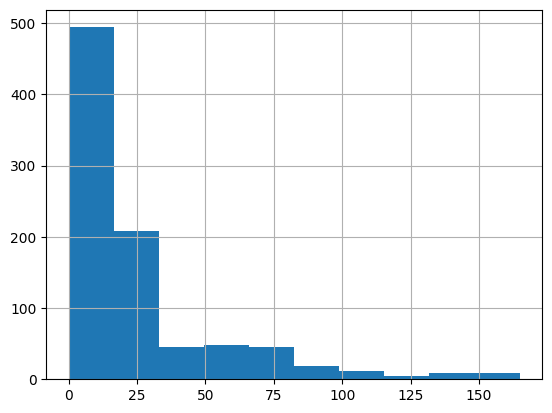

In [169]:
df[col].astype(float).hist()

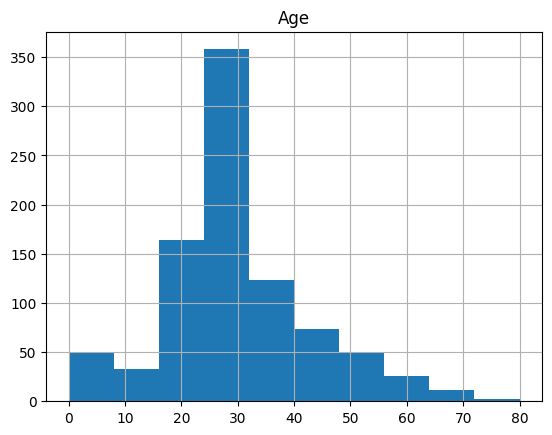

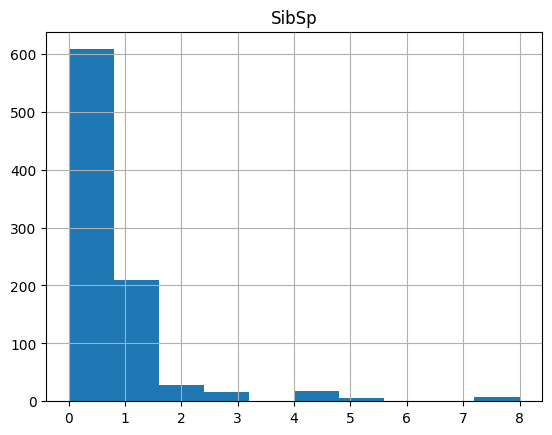

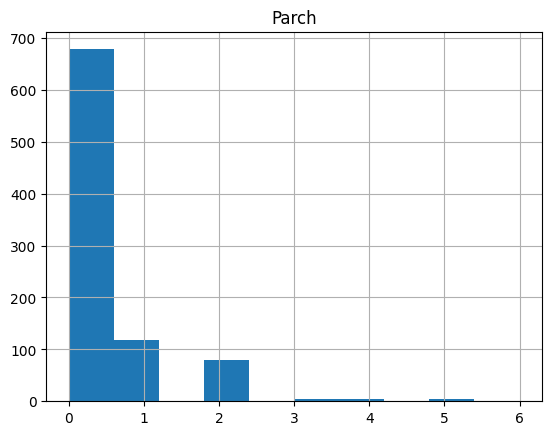

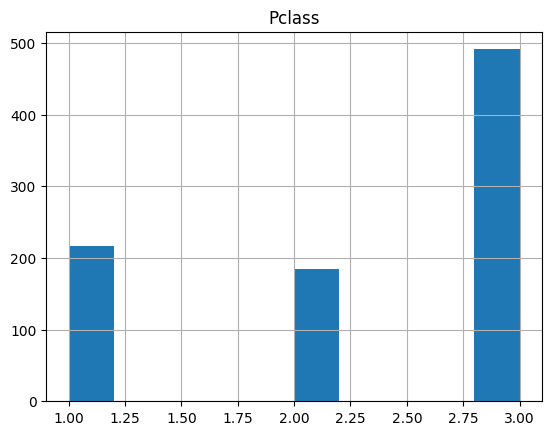

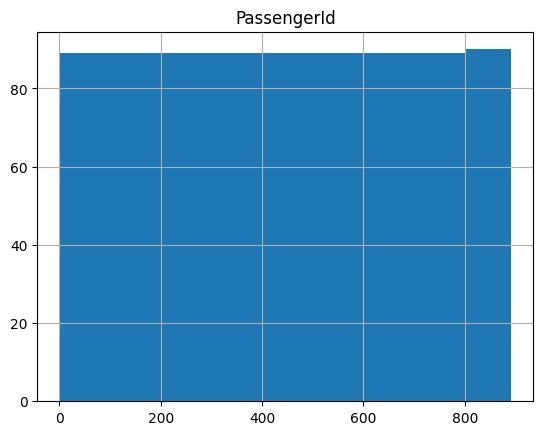

In [170]:
import matplotlib.pyplot as plt

# Assuming 'discrete columns' is a list of column names in the DataFrame 'df'
for col in discrete_columns:
    df[col].hist()
    plt.title(col)
    plt.show()

In [171]:
# OneHot Encoding for ML
onehot_encoders = {}
new_columns = []

for col in nominal_columns:
    encoder = OneHotEncoder(sparse_output=False)
    new_data = encoder.fit_transform(df[col].to_numpy().reshape(-1, 1))

    new_columns.extend(encoder.get_feature_names_out([col]))

    new_df = pd.DataFrame(new_data, columns=encoder.get_feature_names_out([col]))
    df = pd.concat([df, new_df], axis=1)

    onehot_encoders[col] = encoder

In [172]:
df.drop(columns=nominal_columns, inplace=True)

In [173]:
df.head(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_number,Ticket_length,Sex_female,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735
0,1,0,3,22,1,0,7.2500,521171,9,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,38,1,0,71.2833,17599,8,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,1,3,26,0,0,7.9250,23101282,16,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,1,1,35,1,0,53.1000,113803,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,3,35,0,0,8.0500,373450,6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,0,3,28,0,0,8.4583,330877,6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,0,1,54,0,0,51.8625,17463,5,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,0,3,2,3,1,21.0750,349909,6,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,1,3,27,0,2,11.1333,347742,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,1,2,14,1,0,30.0708,237736,6,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
df[df.isnull().any(axis=1)].isnull()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Ticket_number,Ticket_length,Sex_female,...,Ticket_STON/O2. 3101290,Ticket_SW/PP 751,Ticket_W./C. 14258,Ticket_W./C. 14263,Ticket_W./C. 6607,Ticket_W./C. 6608,Ticket_W./C. 6609,Ticket_W.E.P. 5734,Ticket_W/C 14208,Ticket_WE/P 5735


In [175]:
len(df) == len(df.dropna())

True

In [176]:
non_numeric_columns = df.select_dtypes(exclude='number')
print(non_numeric_columns.dtypes)

Series([], dtype: object)


In [177]:
df.max().max()

23101294.0

In [179]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler_list = []
for col in df.columns:
    min_max_scaler = MinMaxScaler()
    df[col] = min_max_scaler.fit_transform(df[[col]])
    min_max_scaler_list.append(min_max_scaler)

In [180]:
df.max().max()

1.0000000000000002

In [181]:
df.min().min()

0.0

In [182]:
from pathlib import Path

# Creating folders
def create_new_folder(folder):
    Path(folder).mkdir(parents=True, exist_ok=True)

folder = '../artifacts/encoders'
create_new_folder(folder)

folder = '../artifacts/preprocessed_data'
create_new_folder(folder)

In [185]:
import pickle


with open('../artifacts/encoders/onehot_encoders.pkl', 'wb') as file:  # 'wb' means "write binary" way
    pickle.dump(onehot_encoders, file)

with open('../artifacts/encoders/min_max_scaler.pkl', 'wb') as file:  # 'wb' means "write binary" way
    pickle.dump(min_max_scaler_list, file)

In [186]:
df.to_csv('../artifacts/preprocessed_data/saved_dataframe_new.csv', index=False)